In [1]:
#First we will install necessary Library by below command
#!pip install library_name

In [2]:
#after install importing libraries
import pandas as pd 
#for data cleaning and analysis, pd is useds as short form of pandas

import numpy as np 
#NumPy is mostly used for working with Numerical values as it makes it easy to apply mathematical functions

import matplotlib.pyplot as plt 
#Matplotlib is a cross-platform, data visualization and graphical plotting library (histograms, scatter plots, bar charts, etc)

import warnings as wr 
#warnings. warn() method with one parameter which will serve as the message from the warning and Python will use the UserWarning class as the warning category explicitly.

from sklearn.model_selection import train_test_split as tts
#The train_test_split() method is used to split our data into train and test sets. 
#First, we need to divide our data into features (X) and labels (y). The dataframe gets divided into X_train,X_test , y_train 
#and y_test. X_train and y_train sets are used for training and fitting the model. The X_test and y_test sets are used for 
#testing the model if it’s predicting the right outputs/labels. we can explicitly test the size of the train and test sets. 
#It is suggested to keep our train sets larger than the test sets.

wr.filterwarnings('ignore') 
# we are ignoring the warning message 

In [3]:
df=pd.read_csv('Height-Weight Data.csv') # We have imported our data set

In [4]:
df.head() #by this function we are showing our dataset 5 rows including all col

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
#df=pd.read_excel('Height-Weight Data.xls') if we work with excel dataset
#df.head() by this function we are showing our dataset 5 rows including all col

In [6]:
df.head(2)# it will show two row with all column

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473


In [7]:
df.shape #its showing our database shape like we have 3501 row and 2 column

(3501, 2)

In [42]:
row, col = df.shape #it will show how many rows and column are in dataset

In [9]:
df.tail()#it shows last 5 row

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [10]:
df[25:30] #it will show the data from 25 to 29

,Height,Weight
25,68.144033,192.343977
26,69.089631,184.435174
27,72.800844,206.828189
28,67.421242,175.213922
29,68.496415,154.342639


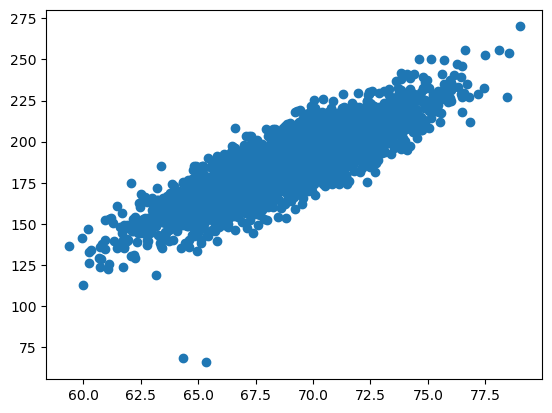

In [11]:
plt.scatter(df.Height, df.Weight) # calling x and y value from dataset
#The scatter() function plots one dot for each observation. It needs two arrays of the same length, one for the values of the x-axis, and one for values on the y-axis

Text(0.5, 1.0, 'Height-Weight Data')

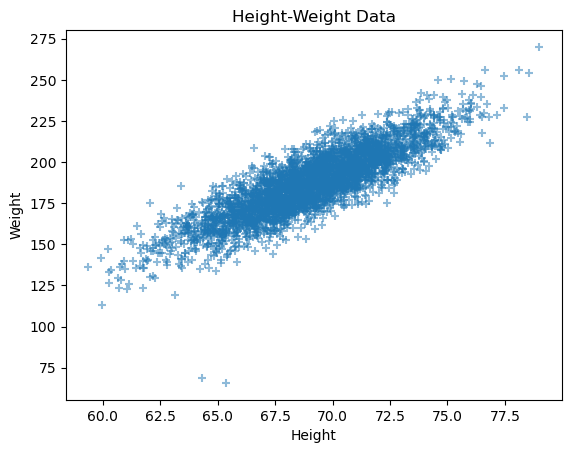

In [12]:
plt.scatter(df[['Height']], df[['Weight']],cmap='viridis', marker='+', alpha=0.5) # calling x and y by multidimension way
#The scatter() function plots one dot for each observation. It needs two arrays of the same length, one for the values of the x-axis, and one for values on the y-axis

plt.ylabel('Weight') # name of y label
plt.xlabel('Height')# name of x label
plt.title('Height-Weight Data') # plot title

In [13]:
df.Weight.mean()# we have findout the mean value of Weight by mean() function

186.89125797946284

In [14]:
df.Height.mean()# we have findout the mean value of Height by mean() function

69.02441087268797

In [15]:
x=df.drop('Weight', axis=1) #here we have assign Height to x

In [16]:
x

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
3496,69.296830
3497,70.542201
3498,73.912549
3499,67.396021


In [17]:
y=df[['Weight']]# here we have assign the Weight value to y

In [18]:
y

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801
...,...
3496,185.649086
3497,210.198845
3498,202.429960
3499,144.277671


In [19]:
xtrain,xtest,ytrain,ytest=tts(x,y, test_size=0.33, random_state=1)
#we hare devided the data for training and testing, for testing we selected 33% data,random_state Controls the shuffling applied to the data before applying the split.

In [20]:
xtrain.head() #training data

,Height
166,66.262820
1011,71.738695
1344,67.750330
1563,71.690869
476,68.515523


In [21]:
ytrain.head()#training data

,Weight
166,162.779583
1011,185.842622
1344,179.115883
1563,188.656335
476,176.141239


In [22]:
xtest.head()#testing data

,Height
719,67.402821
2296,69.560033
3083,65.809912
1296,67.687531
2234,65.077902


In [23]:
ytest.head()#testing data

,Weight
719,192.672676
2296,187.491501
3083,191.563495
1296,177.909685
2234,165.313807


# Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression 
#we are callilng linear regression algorithm from scikit-learn library
#The scikit-learn library in Python implements Linear Regression through the LinearRegression class. 
#This class allows us to fit a linear model to a dataset, predict new values, and evaluate the model's performance

In [25]:
reg= LinearRegression()#creating Linear regression object

In [26]:
reg.fit(xtrain,ytrain) #training model

LinearRegression()

In [27]:
reg.predict([[66.262820]])

array([[170.31512083]])

In [28]:
m=reg.coef_ # The linear regression coefficients describe the mathematical relationship between each independent variable and the dependent variable.

In [29]:
c=reg.intercept_ #where best fit line touches to Y

In [30]:
m

array([[5.9467582]])

In [31]:
c

array([-223.73384719])

In [32]:
predicted=(m*73.847017)+c #

predicted

array([[215.41650651]])

In [33]:
reg.predict(xtest)#we are predecting the xtest value

array([[177.09443165],
       [189.92284867],
       [167.62178605],
       ...,
       [179.20146692],
       [198.1912708 ],
       [190.70609708]])

In [34]:
df2=df.copy() #we have copy the database under df2

df2['predicted']=reg.predict(df[['Height']]) # here we have created a column named predicted by calculating the predected value of Height to compare

In [35]:
df2.head()

,Height,Weight,predicted
0,73.847017,241.893563,215.416507
1,68.781904,162.310473,185.295505
2,74.110105,212.740856,216.981030
3,71.730978,220.042470,202.832937
4,69.881796,206.349801,191.836295


# Best fit line

Text(0.5, 1.0, 'Height-Weight Data')

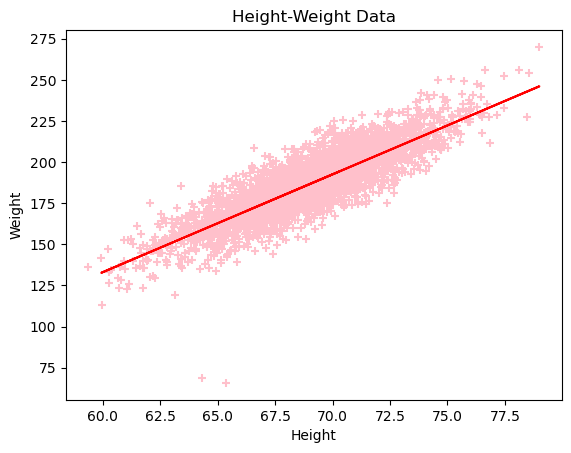

In [36]:
plt.scatter(df[['Height']], df[['Weight']], color='pink', marker='+')
plt.plot(xtrain,reg.predict(xtrain), color='red')
plt.ylabel('Weight')
plt.xlabel('Height')
plt.title('Height-Weight Data')

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error #Mean Absolute Error(MAE) is the mean size of the mistakes in collected predictions

#The Mean Absolute Error is the squared mean of the difference between the actual values and predictable values

In [38]:
#testing MSE
test_mse=mean_squared_error(ytest,reg.predict(xtest))#we are calculating the error or cost by means squared error from test data

test_mse

111.14654406073984

In [39]:
#testing MAE

test_mae=mean_absolute_error(ytest, reg.predict(xtest))#we are calculating the error or cost by means absolute error from test data
test_mae

8.29430074943638

In [40]:
#training MSE
train_mse = mean_squared_error(ytrain, reg.predict(xtrain)) #we are calculating the error or cost by means squared error from training data
train_mse

103.48759292384861

In [41]:
#training MAE
train_mae=mean_absolute_error(ytrain, reg.predict(xtrain))#we are calculating the error or cost by means absolute error from training data
train_mae

7.9554884524224185